## 학습 목표
- scikit-learn에 내장된 예제 데이터셋의 종류를 알고 활용할 수 있다.
- scikit-learn에 내장된 분류 모델들을 학습시키고 예측해 볼 수 있다.
- 모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.
- Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.
- 데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다

[scikit-learn.org 바로가기](https://scikit-learn.org/stable/)


먼저 패키지를 install해 준다.

```python
$ pip install scikit-learn    
$ pip install matplotlib
```
사이킷런은 파이썬을 기반으로 한 머신러닝 생태계에서 오랜 기간 동안 사랑받고 있는 라이브러리아다. 최근에는 TensorFlow, PyTorch 등 딥러닝에 특화된 라이브러리들이 강세를 보이지만, 머신러닝의 다양한 알고리즘과 편리한 프레임워크를 제공한다는 점으로 인해 여전히 많은 데이터 분석가들이 사용하고 있다.

scikit-learn은 간단하고 작은 데이터셋인 Toy datasets과 비교적 복잡하고 현실 세계를 반영한 Real world datasets, 두 가지 종류의 데이터셋을 제공합니다.
오늘은 toy datasets에 있는 iris dataset을 살펴보자.

![](https://images.velog.io/images/och9854/post/e05fe194-2c37-493e-b2d4-80075836a560/image.png)

총 150개의 데이터가 있으며, sepal/petal의 width와 length 정보가 있음을 확인할 수 있다. 클래스는 3개로 나뉘어있음 또한 알 수 있다.

데이터셋을 다루기 전에 이렇게 데이터셋의 정보를 먼저 확인하는 것은 중요하다. 데이터를 얼마나 이해하고 있느냐는 그 데이터를 활용한 결과와 성능에 중대한 요소가 되기 때문이다.


In [8]:
from sklearn.datasets import load_iris

iris = load_iris() #iris data loading

print(dir(iris))
print(iris.keys())
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


가장 중요한 데이터는 iris_data 변수에 저장한 후, 데이터의 크기를 확인해 보자

In [9]:
iris_data = iris.data

print(iris_data.shape) 
#shape는 배열의 형상정보를 출력

print(iris_data[0]) #예시로 하나의 데이터를 살펴보자. # sepal,petal에 대한 각각의 length, width 값

(150, 4)
[5.1 3.5 1.4 0.2]


위의 4가지 데이터로 붓꽃의 클래스를 분류해 내야 한다. 이렇게 머신러닝이 출력해야 하는 정답을 `라벨` 또는 `타겟`이라고 한다.

In [10]:
iris_label = iris.target
print(iris_label.shape)
print(iris_label)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


라벨의 이름은 다음과 같이 `target_names`에서 확인할 수 있다.

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

`feature_names`에는 다음과 같이 각 4개의 feature에 대한 설명이 담겨있다.

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

마지막으로 `file_name`에서는 데이터셋의 전체 이름을 보여준다.

In [13]:
iris.filename

'iris.csv'

본격적으로 실습을 시작해보자.
___

# 1. 첫 번째 머신러닝 실습, 간단하고도 빠르게!

## (1) 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비
pandas 라이브러리는 표 형태로 이루어진 2차원 배열 데이터를 다루는 데에 가장 많이 쓰이는 도구이다. 표 데이터를 활용해서 데이터 분석을 하기도 하고, 대형 데이터의 여러 통계량을 다루는 것에도 최적화가 되어있다.

`iris`데이터 또한 2차원 데이터이므로 우리도 `pandas`를 이용해 iris data를 다뤄보자.

`dataframe`에 `iris_data`를 넣고, `feature_name`으로 각 칼럼에 이름을 붙여준다.
추가로, 정답데이터 칼럼도 함께 추가해준다.

In [25]:
import pandas as pd
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df["label"] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


여기서 4가지 feature 데이터들은 머신러닝이 풀어야 하는 문제이며, label은 정답지이다.
정리하면, 
- 문제지 : 머신러닝 모델에게 입력되는 데이터. 변수명으로는 X를 많이 사용한다.
- 정답지 : 머신러닝 모델이 맞혀야 하는 데이터. 변수명으로는 y를 많이 사용한다.

이제 training dataset과 test dataset으로 데이터셋을 나눠보자.
데이터셋을 분리하는 것은 `train_test_split`을 활용해서 간단히 분리할 수 있다.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


`train_test_split` 에는 feature, label을 제공해야하며, `test_size`를 지정하고, ` ramdom_state`는 train data와 test data를 split하는 데 적용되는 랜덤성을 결정한다.

하지만 컴퓨터에서의 랜덤은 램덤이라고 하더라도 `특정 로직에 따라 결정되는 랜덤`이기 때문에 완벽한 랜덤이라고 할 수 없다.   
그러한 랜덤을 조절하게 하는 값이 `ramdom_state` or `random_seed`이다. 이 값이 같다면 코드는 항상 동일한 랜덤 결과를 출력한다.
이는 타인의 컴퓨터에서도 reproduce하고 싶은 경우에 용이하다.

이제 만들어진 데이터셋을 확인해보자.

In [16]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [17]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [18]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

원하던 대로, random하게 섞여서 데이터셋이 만들어졌다.
___

## (2) 첫 번째 머신러닝 모델 학습시키기
iris_data의 경우 `지도 학습`, `분류 문제`이다
이런 경우에는 어떤 ML model을 써야할 지 명확해진다. 바로 지도학습 중에서 분류를 할 수 있는 모델을 찾아보는 것이다!

여러 가지 분류 모델이 있는데, 첫 번째로 Decision Tree 모델을 사용해보자.
- 직관적이면서도 간단하게 사용할 수 있어, 가장 기본적으로 쓰이는 모델 중 하나이다.
- 간단히 말해,데이터를 분리할 특정 경계를 찾아내어 체에 거르듯 분류해나가는 모델이다.
- 학습 과정은 크게 2가지로 나뉜다.   
  1) recursive partitioning: 입력 변수 영역을 두개로 구분한다.   
  2) pruning: 너무 자세하게 구분된 영역을 통합한다.(overfitting 방지)

Decision Tree는 `sklearn.tree` 패키지 내에 `DecisionTreeClassifier`라는 이름으로 내장되어 있다. 이제 모델을 import해서 가져오고, 변수에 모델을 저장해보자.

In [19]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


이제 train data로 학습을 시작해보자.

In [20]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

메서드의 이름이 `fit`임을 확인할 수 있는데, 그 이유는 모델을 training dataset에 맞게 `fitting`하는 것이라고 할 수 있기 때문이다.
training dataset에 있는 데이터를 통해 어떤 패턴을 파악하고, 그 패턴에 맞게 예측하도록 학습되기 때문이다.
___

## (3) 첫 번째 머신러닝 모델 평가하기
학습이 완료되었으니 test data로 예측을 해보자.

In [28]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

`X_test` 데이터는 label 없이 feature data만 존재한다. 따라서 학습이 완료된 decision_tree 모델에 `X_test`데이터로 `predict`를 시행하면 모델이 예측한 `y_pred`를 얻게 된다.

y_pred와 y_test를 비교할 땐 scikit-learn에서 (성능 평가에 대한 함수들이 모여있는) `sklearn.metrics`패키지를 이용하면 된다.

성능을 평가하는 방법 중 __정확도__를 확인해보자.

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

___
# 2. Iris의 세 가지 품종, 분류해볼 수 있겠어요?
## (4) 다른 모델도 해 보고 싶다면? 코드 한 줄만 바꾸면 돼!

다른 모델들을 다루기 전에 Decision Tree 모델에 대해 한 번 정리하고 넘어가자.

In [30]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



여기서 모델을 바꾸려면, (4)에 있는 모델만 바꿔주면 된다!!!
모델이 바뀐다 하더라도 진행흐름은 크게 변하지 않으니 `흐름을 잘 기억해두자!`

### 1) Random Forest
Random Forest는 Decision Tree를 여러 개 모아 놓은 모델이다.
 - Ensemble learning: the process by which multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem.
 - 하나의 거대한 (깊이가 깊은) 결정 트리를 만드는 게 아니라 여러 개의 작은 결정 트리를 만드는 것
 - [참고자료](https://8888-wba4talb06szxhhlh871o5wuw.e.prod.connect.ainize.ai/view/aiffel/Exploration/02_iris_classification/img/Random%20Forest%2003.gif)
 - 상위 모델들이 예측하는 편향된 결과보다, 여러 모델의 결과를 반영해 더 다양한 데이터에 대해 의사결정을 내릴 수 있다.
 - `sklearn.ensemble` 패키지 내에 들어있다.


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



다른 scikit-learn 내장 분류모델도 살펴보자


### 2) SVM(Support Vector Machine)
Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행하는 선형 분류 알고리즘이다.

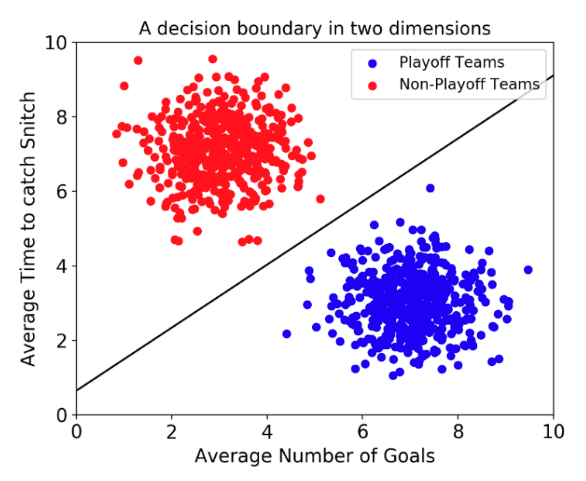

2차원 공간에서 데이터에 `2개의 클래스만` 존재할 떄,
- Decision Boundary(결정 경계): 두 클래스를 구분
- Support Vector: Decision Boundary에 가까이 있는 데이터
- Margin: Decision Boundary와 Support Vector 사이의 거리

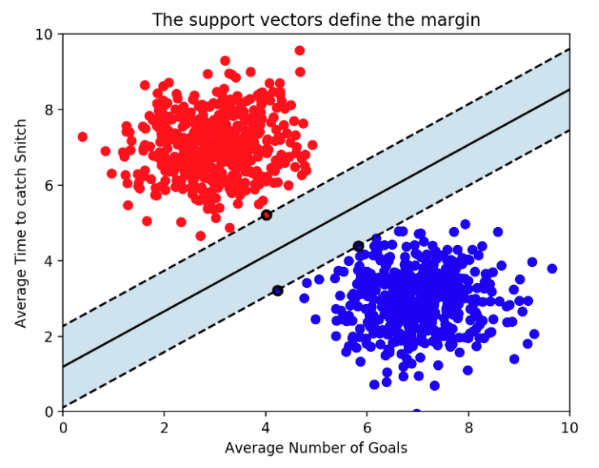

Margin이 넓을수록 데이터를 잘 구분한다. (robustness 최대화)
- `Kernal Trick`: simple method where a Non Linear data is projected onto a higher dimension space so as to make it easier to classify the data where it could be linearly divided by a plane.
- `cost`: cost parameter decides how much an SVM should be allowed to “bend” with the data. For a low cost, you aim for a smooth decision surface and for a higher cost, you aim to classify more points correctly. It is also simply referred to as the cost of misclassification.
- `γ`: the `gamma parameter` defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 

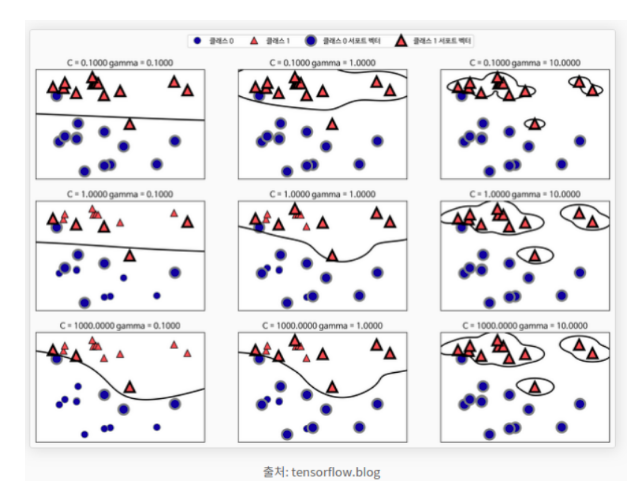

많은 선형 분류 모델은 대부분 이진 분류 모델이다. 하지만, 이진 분류 알고리즘을 일대다 방법을 사용해 다중 클래스 분류 알고리즘으로 사용할 수도 있다.
일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다.
클래스 수만큼 이진 분류 모델이 생성되고, 에측할 때는 생성된 모든 분류기가 작동하여 최고점을 내는 분류기의 클래스를 예측값으로 선택한다. 그리고, SVM 모델은 다음과 같이 사용한다.

In [32]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


SVM 모델 학습은 다음과 같이 진행한다.

In [33]:
# 코드를 입력하세요

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



___

### 3) Stochastic Gradient Descent Classifier (SGDClassifier)

SGD는 batch_size가 1인 경사하강법 알고리즘이다.
batch란 경사하강법에서 단일 반복에서 기울기를 계산하는 데 사용하는 data의 총 개수이다. SGD에서는 이를 1을 사용해 훨씬 적은 데이터 세트로 중요한 평균값을 추정한다.

- 단점: 노이즈가 심하다. 최저점을 찾지 못할 수 있다.
- solution: 미니 배치 SGD(batch_size를 10~1,000개로 구성)
SGD Classifier 모델은 다음과 같이 사용한다.


In [34]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


 SGD Classifier 모델 학습은 다음과 같이 진행한다.

In [35]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92        12
           2       1.00      0.71      0.83         7

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30




___
### 4) Logistic Regresssion

가장 널리 알려진 선형 분류 알고리즘으로, softmax 함수를 사용한 다중 클래스 분류 알고리즘이다. 이름은 회귀지만, 실제로는 분류를 수행한다.

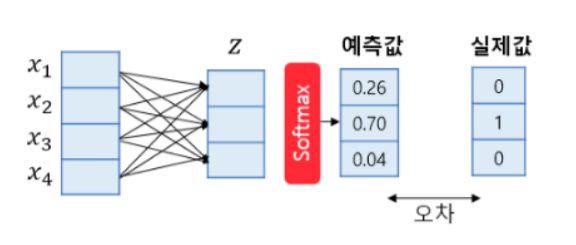
[출처: https://velog.io/@guide333/GD-P2-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%EC%A0%95%EB%A6%AC]

Logistic Regression 모델은 다음과 같이 사용한다.

In [36]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



# 2. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기
## (1) 정확도에는 함정이 있다

예를 들어, 손글씨 데이터인 MNIST 데이터셋에서, 3인지 3이 아닌지를 판별하는 모델을 만들어서 학습을 시켜보자.

In [37]:

# 1. 모듈
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits

# 2. 데이터

digits = load_digits()
digits_data = digits.data
digits_label = digits.target # 기존 target dataset
new_label = [3 if i == 3 else 0 for i in digits_label] # 3인지 아닌지 판단

# 3. 모델
x_train, x_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size =0.2,
                                                    random_state=1)

# 4. 학습
decision_tree = DecisionTreeClassifier(random_state=2)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print(accuracy_score(y_test, y_pred))
                                            


0.9694444444444444


위와 같이 96%라는 높은 성능이 나온다. 하지만, __모델이 모든 답을 0으로만 선택해도 정확도는 90% 이상이 나오게 된다__
이것이 정확도의 함정이다!!

이런 문제는 주로 `불균형 데이터`에서 자주 발생한다.
그렇기에, 분류 문제에서는 정확도 외에 다른 평가 척도도 사용한다.
___

## (2) 정답과 오답에도 종류가 있다!

위에서 확인한 정확도는 전체 데이터 중 `맞은 데이터`를 신경쓰는 척도이다.
하지만, 음성 데이터를 얼마나 안 틀렸느냐도 중요한 경우가 있다.
이렇게 정답과 오답을 구분하여 표현하는 방법은 `오차 행렬(confusion matrix)`라고 부른다.


Confusion matrix: a tool to determine the performance of classifier. It contains information about actual and predicted classifications. The below table shows confusion matrix of two-class, spam and non-spam classifier.

- 오차 행렬은 예측 결과를 TN(True Negative), FP(False Positive), FN(False Negative), TP(True Positive) 4가지로 분류한다.
- 오차 행렬을 나타내는 성능 지표는 5가지가 있다.
  - Sensitivity : True Positive Rate 
  - Specificity : True negative rate
  - Precision : ratio of total number of correctly classified positive examples and the total number of predicted positive examples
  - Accuracy :proportion of the total number of predictions that are correct.
  - F1 score: weighted average of the recall (sensitivity) and precision. F1 score might be good choice when you seek to balance between Precision and Recall. 
  
 
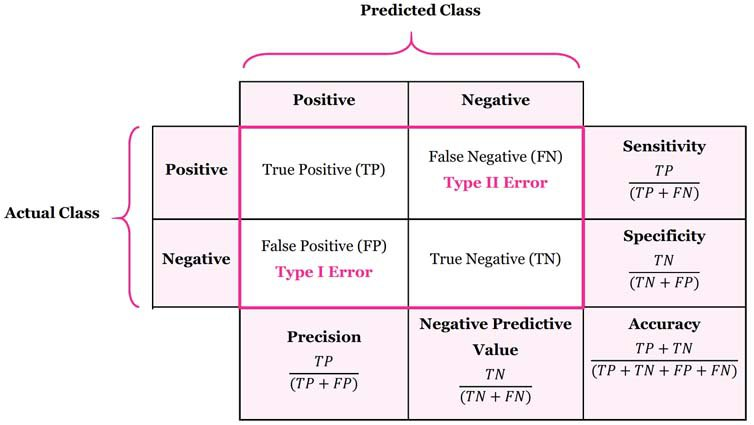
[출처](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)


Precision은 분모에 있는 FPFP가 낮을수록 커진다. Precision이 높아지려면 False Positive, 즉 음성인데 양성으로 판단하는 경우가 적어야 한다.

Recall은 분모에 있는 FNFN이 낮을수록 커진다. Recall이 높아지려면 False Negative, 즉 양성인데 음성으로 판단하는 경우가 적어야 한다.

오차 행렬은 sklearn.metrics 패키지 내의 confusion_matrix로 확인할 수 있다.

모델이 예측한 손글씨 결과를 보자.

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred) # 왼쪽 위부터 TP, FN, FP, TN의 개수를 나탄낸다.

array([[317,   2],
       [  9,  32]])

# 3. 데이터가 달라도 문제 없어요!

## 1) load_digits : 손글씨를 분류해 봅시다

### (1) 필요한 모듈 import 하기

In [106]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비
`load_digits` 메서드를 사용합니다.

In [107]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### (3) 데이터 이해하기

In [108]:
Feature_Data = digits.data
Label_Data = digits.target

print(digits.target_names) #print target names
print('-------------------')
print(digits.DESCR) #data describe

[0 1 2 3 4 5 6 7 8 9]
-------------------
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the n

### (4) train, test 데이터 분리
모델 학습과 테스트용 문제지와 정답지를 준비하자.

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Feature_Data,
                                                    Label_Data,
                                                    test_size= 0.2,
                                                   random_state= 15
                                                   )

print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

(1437, 64), (360, 64), (1437,), (360,)


### (5) 다양한 모델로 학습시켜보기
학습데이터 X_train, y_train을 활용해 분류기 모델을 만들어보자. 어떤 모델이 가장 좋은 성능을 보일까?

1. Decision Tree 사용해 보기
1. Random Forest 사용해 보기
1. SVM 사용해 보기
1. SGD Classifier 사용해 보기
1. Logistic Regression 사용해 보기

In [110]:
## import
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


## make model
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SGD = SGDClassifier()
SGD.fit(X_train, y_train)

Logistic_model = LogisticRegression(max_iter=4000)
Logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

### (6) 모델을 평가해 보기
Q. 학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

A. 아래 코드와 같이, predict를 하여 나온 값과 label 값을 비교한다.   
A. 모델의 성능을 평가하는 지표로는 accuracy, precision, recall, f1 score 등이 있다. 이 중 모델의 상황에 맞게 골라서 평가하면 된다. 앞서 배운 스팸 메일 분류, 암 진단 등의 상황에서 배웠듯 말이다.   
A. 숫자가 틀리고 맞음은 암 데이터에 비해 recall, precision 중 우선순위가 높은 게 없다고 생각을 하였다. 그래서, 이들을 조화평균 하여 score를 내주는 f1 score를 사용하였다.   

In [111]:
# evaluate model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = DecisionTree.predict(X_test)
print(f"accuary: {f1_score(y_test, y_pred, average= 'micro')}")

y_pred = RandomForest.predict(X_test)
print(f"accuary: {f1_score(y_test, y_pred, average= 'micro')}")

y_pred = svm_model.predict(X_test)
print(f"accuary: {f1_score(y_test, y_pred, average= 'micro')}")

y_pred = SGD.predict(X_test)
print(f"accuary: {f1_score(y_test, y_pred, average= 'micro')}")

y_pred = Logistic_model.predict(X_test)
print(f"accuary: {f1_score(y_test, y_pred, average= 'micro')}")

accuary: 0.8611111111111112
accuary: 0.9666666666666667
accuary: 0.9833333333333333
accuary: 0.9388888888888889
accuary: 0.9694444444444444


## 2) load_wine : 와인을 분류해 봅시다
이번에는 와인 종류를 분류해 보자!


### (1) 필요한 모듈 import하기

In [112]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비
`load_wine` 메서드를 사용하자.

In [113]:
wines = load_wine()
wines.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

### (3) 데이터 이해하기

In [114]:
Feature_Data = wines.data
Label_Data = wines.target

print(wines.target_names) #print target names
print('-------------------')
print(wines.DESCR) #data describe

['class_0' 'class_1' 'class_2']
-------------------
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.

### (4) train, test 데이터 분리
모델 학습과 테스트용 문제지와 정답지를 준비해 보자.

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Feature_Data,
                                                    Label_Data,
                                                    test_size= 0.3,
                                                   random_state= 17
                                                   )

print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

(124, 13), (54, 13), (124,), (54,)


### (5) 다양한 모델로 학습시켜보기
1. Decision Tree 사용해 보기
1. Random Forest 사용해 보기
1. SVM 사용해 보기
1. SGD Classifier 사용해 보기
1. Logistic Regression 사용해 보기

In [116]:
## import
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


## make model
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SGD = SGDClassifier()
SGD.fit(X_train, y_train)

Logistic_model = LogisticRegression(max_iter=4000)
Logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

### (6) 모델을 평가해 보기
Q. 학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

A. 아래 코드와 같이, predict를 하여 나온 값과 label 값을 비교한다.   
A. 모델의 성능을 평가하는 지표로는 accuracy, precision, recall, f1 score 등이 있다. 이 중 모델의 상황에 맞게 골라서 평가하면 된다. 앞서 배운 스팸 메일 분류, 암 진단 등의 상황에서 배웠듯 말이다.   
A. 숫자가 틀리고 맞음은 암 데이터에 비해 recall, precision 중 우선순위가 높은 게 없다고 생각을 하였다. 그래서, 앞서 한 손글씨 인식과 동일하게 이들을 조화평균 하여 score를 내주는 f1 score를 사용하였다.    

In [118]:
# evaluate model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred = DecisionTree.predict(X_test)
print(f"accuary: {f1_score(y_test, y_pred, average= 'micro')}")

y_pred = RandomForest.predict(X_test)
print(f"accuary: {f1_score(y_test, y_pred, average= 'micro')}")

y_pred = svm_model.predict(X_test)
print(f"accuary: {f1_score(y_test, y_pred, average= 'micro')}")

y_pred = SGD.predict(X_test)
print(f"accuary: {f1_score(y_test, y_pred, average= 'micro')}")

y_pred = Logistic_model.predict(X_test)
print(f"accuary: {f1_score(y_test, y_pred, average= 'micro')}")

accuary: 0.8888888888888888
accuary: 1.0
accuary: 0.6296296296296297
accuary: 0.5185185185185185
accuary: 0.9814814814814815


## 3) load_breast_cancer : 유방암 여부를 진단해 봅시다

### (1) 필요한 모듈 import하기
### (2) 데이터 준비
### (3) 데이터 이해하기
### (4) train, test 데이터 분리

In [119]:
# 모듈 import
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# 데이터 준비
cancers = load_breast_cancer()
cancers.keys()

#데이터 분리
Feature_Data = cancers.data
Label_Data = cancers.target

#데이터 이해하기
print(cancers.target_names) #print target names
print('-------------------')
print(cancers.DESCR) #data describe

#train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(Feature_Data,
                                                    Label_Data,
                                                    test_size= 0.3,
                                                   random_state= 12
                                                   )

print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")


['malignant' 'benign']
-------------------
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 fe

### (5) 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

In [120]:
## import
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## make model
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SGD = SGDClassifier()
SGD.fit(X_train, y_train)

Logistic_model = LogisticRegression(max_iter=4000)
Logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

### (6) 모델을 평가해 보기
Q. 학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

A. 아래 코드와 같이, predict를 하여 나온 값과 label 값을 비교한다.   
A. 모델의 성능을 평가하는 지표로는 accuracy, precision, recall, f1 score 등이 있다. 이 중 모델의 상황에 맞게 골라서 평가하면 된다. 앞서 배운 스팸 메일 분류, 암 진단 등의 상황에서 배웠듯 말이다.   
A. 암 데이터의 경우, 환자를 양성으로 오진하는 것은 큰 문제가 되지 않지만, 음성으로 오진하여 실제 양성환자를 놓치는 경우 큰 문제가 발생하게 된다. 따라서 `Recall로 score`를 내야 한다고 생각했다. 또한, label이 `양성 혹은 음성 두가지로만` 나뉘기 때문에, average option은 `binary`로 제공하였다.   

In [127]:
# evaluate model

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

y_pred = DecisionTree.predict(X_test)
print(f"accuary: {recall_score(y_test, y_pred, average= 'binary')}")

y_pred = RandomForest.predict(X_test)
print(f"accuary: {recall_score(y_test, y_pred, average= 'binary')}")

y_pred = svm_model.predict(X_test)
print(f"accuary: {recall_score(y_test, y_pred, average= 'binary')}")

y_pred = SGD.predict(X_test)
print(f"accuary: {recall_score(y_test, y_pred, average= 'binary')}")

y_pred = Logistic_model.predict(X_test)
print(f"accuary: {recall_score(y_test, y_pred, average= 'binary')}")

accuary: 0.9439252336448598
accuary: 0.9626168224299065
accuary: 0.9813084112149533
accuary: 0.9719626168224299
accuary: 0.9626168224299065


# 회고
    
   1. 이번 프로젝트에서 **어려웠던 점,**
   
모델을 평가해볼 때 어떤 score를 사용해야할지 가장 고민을 많이 한 것 같다. 또한, wine dataset에서 randomforest 모델로 학습을 시킬 때 계속 정확도가 1이 나와서 의문이 들었다. 그리고, git을 올려야 하는데, 처음에 push는 잘 작동이 되었지만, 이후 업데이트를 하려고 하는데 충돌이 되면서 하나도 업데이트가 되지 않았다.
   그리고, Logistic모델을 처음 사용할 때 iter가 max를 초과하여 제대로 학습이 진행되지 않았다는 경고문이 떴었다. 이를 어떻게 해결하는지 몰랐어서 git push 오류와 함께 구글링을 하는 데 시간을 정말 많이 사용했다. 그럴 때 검색을 잘 하고 싶기도 하고, 뭐가 문젠지를 제대로 빨리 알았다면 더욱 시간을 아낄 수 있을거라는 생각이 들어 아쉬웠다.
   
   2. 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
   
프로젝트를 진행하면서, 이전에 간단히 들어봤던 SVM 등 여러 모델들을 더 자세히 알게 돼서 좋았다.
모호했던 점은, 아직 wine dataset에서 randomforest 모델로 학습을 시킬 때 계속 정확도가 1이 나오는 이유를 이해하지 못했다.
아마 이해하지 못한 이유는 랜덤포레스트를 더 깊게 이해하지 못해서인 것 같다. 일단 제출을 해야해서 수동으로 github에 올리긴 하지만, 클라우드 서버에서 생긴 나의 오류를 해결하고 싶다. ㅠㅠ

   3. 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
   
데이터셋을 맞게 가져와서 로드하고, 각각의 데이터셋에 모델을 적용하였다. 이 둘은 앞에서 계속 학습해왔기 때문에 손에 익기도 했고, 그냥 하면 되는 것이기 때문에 크게 어렵지는 않았다.
하지만, 마지막 루브릭 `3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?`이 어려웠다. 어떤 score를 사용해서 점수를 내는지는 인터넷을 직접 찾아보면서 해야했었고, 데이터셋에 대한 분석도 필요했기 때문에 아무래도 가장 어려웠던 루브릭이 아닐까 싶다.

scikit-learn.org를 정말 많이 찾아보면서 정말 많은 score들을 찾아봤다. 오차 행렬도 더욱 깊게 이해하려고 했고, recall, precision 등 각각이 어떤 상황에서 사용되는지를 추가로 많이 찾아보았다.


   4. 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.
   
3번째 평가문항에서 달성하지 못할 것 같다. `3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?` `평가지표 선택 및 이유 설명이 타당함`이라는 상세기준에 확신이 없다. MNIST dataset이나 wine dataset에서는 암 진단 모델과 다르게 명확히 우선순위가 없다고 생각했기 때문이다.  
   
   
   5. **자기 다짐**
   
모르는 것에 대해 혼자서 끙끙 앓는 시간이 많았다. 꼭 질문하는 습관을 들이고 싶다.  
혼자서 고민하는 것 또한 중요하지만, 시간이 비효율적으로 쓰일 때는 포기하고, 타인에게 물어보는 용기를 길러야겠다.  